In [1]:
import pandas as pd
import numpy as np
import urllib.parse

%matplotlib inline

In [2]:
APP_TOKEN = '2EqneQvd21Xp25hEqUeBSW2b6' # lets me query more data faster than guest user
MAX_PG_LIMIT = 50000 # maximum allowable on socrata

In [3]:
params = urllib.parse.urlencode({'$$app_token': APP_TOKEN,
                                 '$where': 'parks_nm IS NOT NULL', 
                                 '$limit': MAX_PG_LIMIT})

crime_in_parks = pd.read_json("https://data.cityofnewyork.us/resource/5uac-w243.json?" + params)
crime_in_parks.head()

,addr_pct_cd,boro_nm,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_num,cmplnt_to_dt,cmplnt_to_tm,crm_atpt_cptd_cd,hadevelopt,housing_psa,...,station_name,susp_age_group,susp_race,susp_sex,transit_district,vic_age_group,vic_race,vic_sex,x_coord_cd,y_coord_cd
0,25,MANHATTAN,2019-05-21T00:00:00.000,17:00:00,264363701,2019-05-22T00:00:00.000,20:00:00,COMPLETED,NaN,645.0,...,NaN,UNKNOWN,BLACK,M,NaN,<18,BLACK,F,1001322,235045
1,48,BRONX,2019-03-24T00:00:00.000,14:25:00,883586818,2019-03-24T00:00:00.000,14:30:00,COMPLETED,NaN,NaN,...,NaN,<18,WHITE HISPANIC,F,NaN,<18,BLACK HISPANIC,F,1014258,246497
2,47,BRONX,2019-06-21T00:00:00.000,20:14:00,802992789,2019-06-21T00:00:00.000,21:19:00,COMPLETED,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,M,NaN,<18,WHITE HISPANIC,M,1022660,260115
3,7,MANHATTAN,2019-06-23T00:00:00.000,07:00:00,279614624,2019-06-23T00:00:00.000,07:30:00,COMPLETED,NaN,NaN,...,NaN,UNKNOWN,WHITE HISPANIC,F,NaN,25-44,WHITE,F,988934,200565
4,5,MANHATTAN,2019-06-01T00:00:00.000,00:06:00,747856938,2019-06-01T00:00:00.000,00:07:00,COMPLETED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,D,985184,198231


In [4]:
crime_in_parks.shape

(1640, 35)

# Data Cleaning

In [5]:
# change specific fields to datetime datatype
date_list = ['cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt', 'cmplnt_to_tm', 'rpt_dt']
crime_in_parks = crime_in_parks.apply(lambda x: pd.to_datetime(x) if x.name in date_list else x)

# Analysis

### Number of in-park crimes over time

In [6]:
# number of in-park crimes by year and month
crime_in_parks['cmplnt_num'].groupby([crime_in_parks['cmplnt_fr_dt'].dt.year,\
                                      crime_in_parks['cmplnt_fr_dt'].dt.month\
                                     ]).agg('count')

cmplnt_fr_dt  cmplnt_fr_dt
2011          6                 1
2016          2                 1
2017          1                 1
2018          1                 1
              7                 1
              8                 2
              9                 2
              10                3
              11                2
              12                8
2019          1               123
              2               111
              3               219
              4               269
              5               425
              6               471
Name: cmplnt_num, dtype: int64

Text(0,0.5,'Count')

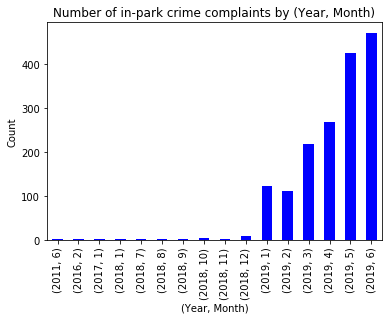

In [7]:
temp = crime_in_parks['cmplnt_num'].groupby([crime_in_parks['cmplnt_fr_dt'].dt.year,\
                                      crime_in_parks['cmplnt_fr_dt'].dt.month\
                                     ]).agg('count')
ax = temp.plot.bar(color='b', title='Number of in-park crime complaints by (Year, Month)')
ax.set_xlabel('(Year, Month)')
ax.set_ylabel('Count')
# compare to number of parks?